# Week 3


#### Exercise:
Join kaggle.com and choose a real-world dataset. (This is part of your homework, try to do some research on Kaggle.)                                       
Download the data of your choice.                                                                                                          
Practice data cleaning and preprocessing, handle missing values, outliers etc.                                                                
Explore the basic statistics with pandas methods.                                                                                                 
Create visualizations to understand the distribution of variables.                                                                                    
Identify correlations between variables using correlation matrices and/or heatmaps.                                                                   
Derive insights from your analysis. What interesting patterns or trends did you discover?

In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
base_url=r"data\Traffic.csv"
traffic_data  = pd.read_csv(base_url)

In [3]:
traffic_data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [5]:
# Change spaces in column names
for col in traffic_data.columns:
  if " " in col:
    traffic_data.rename(columns={col: col.replace(" ", "_")}, inplace=True)
print(traffic_data.columns)

Index(['Time', 'Date', 'Day_of_the_week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic_Situation'],
      dtype='object')


In [6]:
# Missing data check
for col in traffic_data.columns:
    print(col, traffic_data[col].isna().sum())

Time 0
Date 0
Day_of_the_week 0
CarCount 0
BikeCount 0
BusCount 0
TruckCount 0
Total 0
Traffic_Situation 0


In [7]:
# Average calculation
mean_car = traffic_data["CarCount"].mean()
print(f"Car mean: {mean_car}")
mean_bike = traffic_data["BikeCount"].mean()
print(f"Bike mean: {mean_bike}")
mean_bus = traffic_data["BusCount"].mean()
print(f"Bus mean: {mean_bus}")
mean_truck = traffic_data["TruckCount"].mean()
print(f"Truck mean: {mean_truck}")

Car mean: 68.69657258064517
Bike mean: 14.91733870967742
Bus mean: 15.279569892473118
Truck mean: 15.324932795698924


In [8]:
# Median calculation
median_car = traffic_data["CarCount"].median()
print(f"Car median: {median_car}")
median_bike = traffic_data["BikeCount"].median()
print(f"Bike median: {median_bike}")
median_bus = traffic_data["BusCount"].median()
print(f"Bus median: {median_bus}")
median_truck = traffic_data["TruckCount"].median()
print(f"Truck median: {median_truck}")

Car median: 64.0
Bike median: 12.0
Bus median: 12.0
Truck median: 14.0


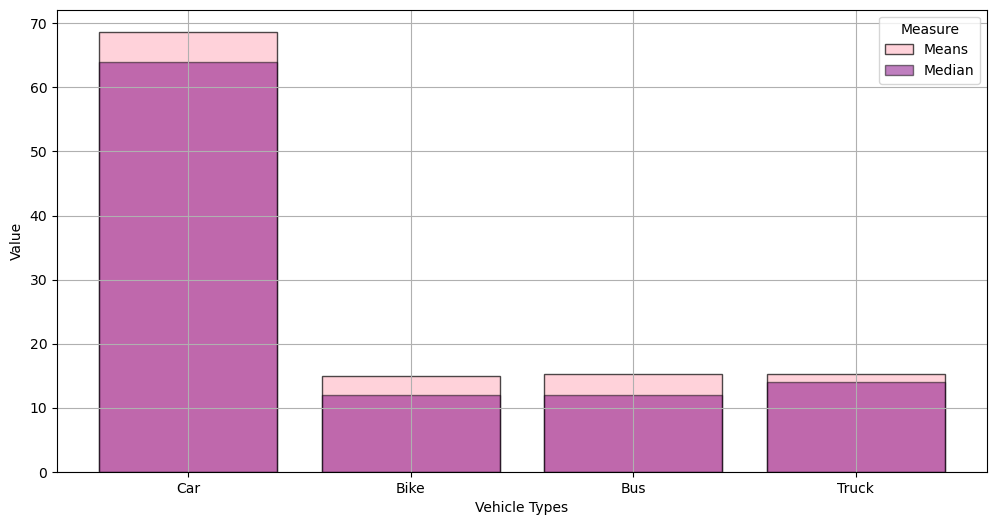

In [22]:
#Graph of Median and Mean 
vehicles = ['Car', 'Bike', 'Bus', 'Truck']
means = [mean_car, mean_bike, 
        mean_bus, mean_truck]
medians = [median_car, median_bike,
           median_bus, median_truck]

plt.figure(figsize=(12, 6) )
a=plt.bar( vehicles, means, color='pink', edgecolor='black', alpha=0.7 )
b=plt.bar( vehicles, medians, color='purple', edgecolor='black', alpha=0.5 )
plt.xlabel('Vehicle Types')
plt.ylabel('Value')
plt.legend( (a, b), ('Means', 'Median'), title='Measure' )
plt.grid( True )
plt.show()


Text(0.5, 1.0, 'Total Number of Vehicles by Vehicle Types')

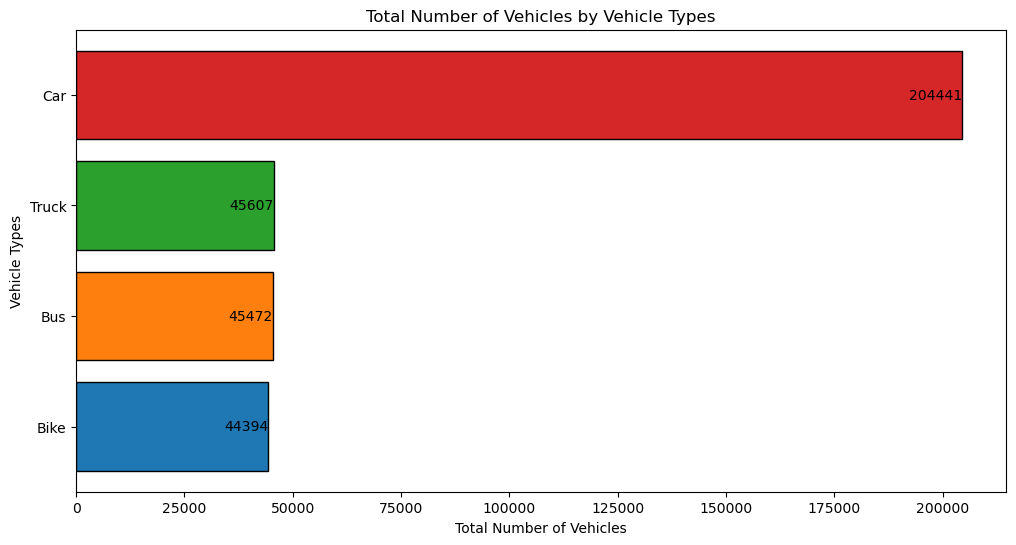

In [9]:
#Graph of the number of vehicles by type in a month
totalCar=traffic_data['CarCount'].sum()
totalBus=traffic_data['BusCount'].sum()
totalBike=traffic_data['BikeCount'].sum()
totalTruck=traffic_data["TruckCount"].sum()
total_data = pd.DataFrame({

    'Vehicle': ['Car', 'Bus', 'Bike', 'Truck'],
    'Total Count':[ totalCar, totalBus, totalBike, totalTruck]
})
total_data = total_data.sort_values(by='Total Count')

'''Araç sayısını kontrol etmek için ekrana yazdırdım.
print(f"Total Car: {totalCar}")
print(f"Total Bus: {totalBus}")
print(f"Total Bike: {totalBike}")
print(f"Total Truck: {totalTruck}")
'''

plt.figure(figsize=(12, 6))
plt.barh(
    total_data['Vehicle'],
    total_data['Total Count'], 
    color=mcolors.TABLEAU_COLORS,
    edgecolor='black')

#Structure used to print numerical values in columns
for i, val in enumerate(total_data['Total Count']):
    plt.text(val, i, f'{val}', ha='right', va='center')

plt.xlabel('Total Number of Vehicles')
plt.ylabel('Vehicle Types')
plt.title('Total Number of Vehicles by Vehicle Types')

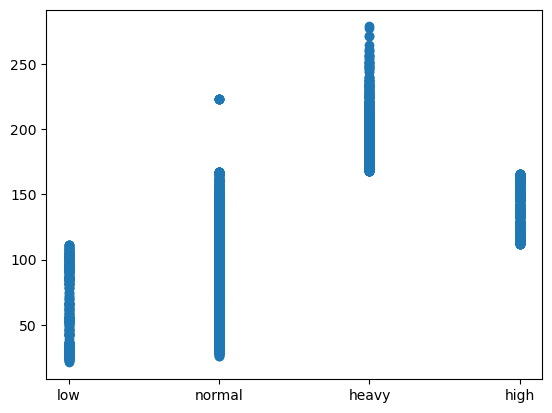

In [10]:
#Graph showing traffic density according to the total number of vehicles per day
plt.scatter(traffic_data['Traffic_Situation'], traffic_data['Total'])

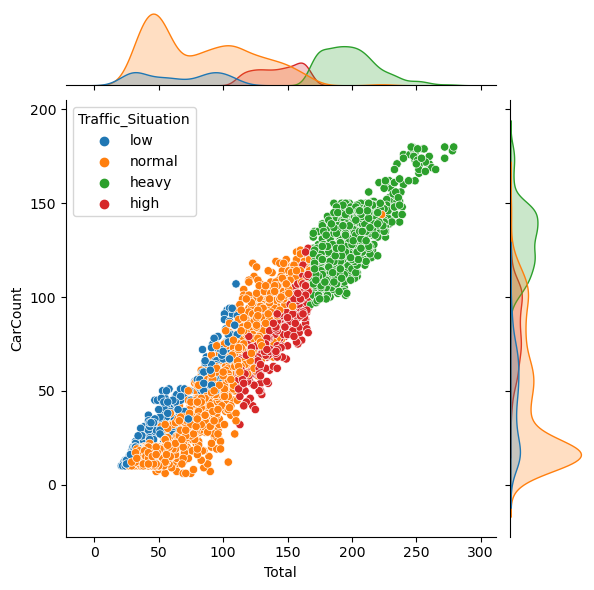

In [41]:
#Graph showing the density in which traffic situation according to vehicle type
#The same can be done for other vehicles.
sns.jointplot(data=traffic_data, x="Total", y="CarCount", hue="Traffic_Situation")

In [79]:
#To get a day's worth of data I take the first 96 rows
traffic_data_copy = traffic_data.copy()
df_1d = traffic_data.head(96) 

[Text(0.0, 0, '12:00:00 AM'),
 Text(10.0, 0, '2:30:00 AM'),
 Text(20.0, 0, '5:00:00 AM'),
 Text(30.0, 0, '7:30:00 AM'),
 Text(40.0, 0, '10:00:00 AM'),
 Text(50.0, 0, '12:30:00 PM'),
 Text(60.0, 0, '3:00:00 PM'),
 Text(70.0, 0, '5:30:00 PM'),
 Text(80.0, 0, '8:00:00 PM'),
 Text(90.0, 0, '10:30:00 PM')]

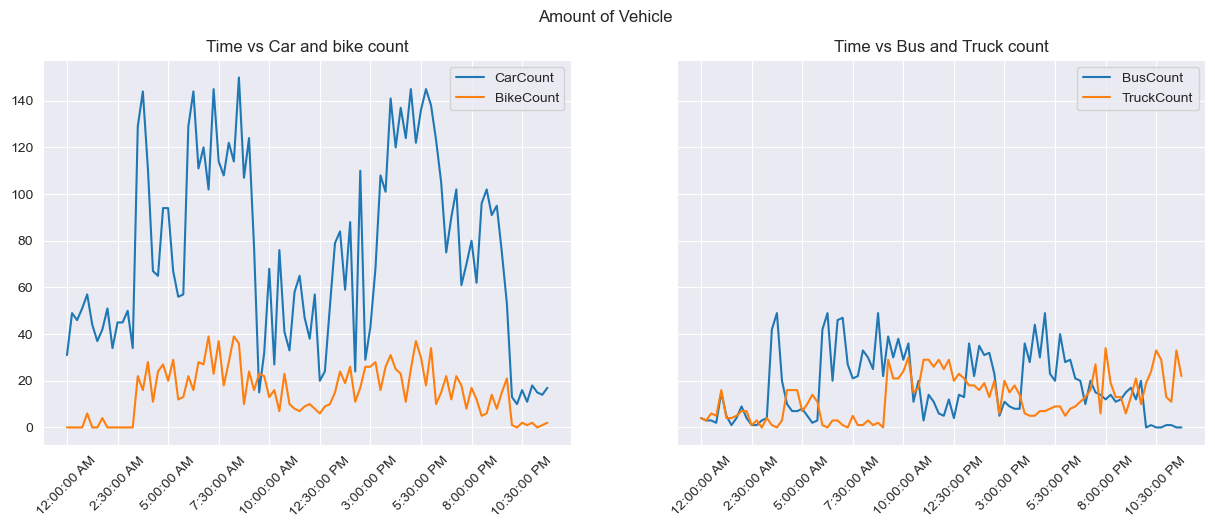

In [81]:
#Comparison of the number of vehicles in selected time intervals within a daily data
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Amount of Vehicle')
#For the first figure
axes[0].plot(df_1d['Time'], df_1d['CarCount'])
axes[0].plot(df_1d['Time'], df_1d['BikeCount'])
axes[0].legend(traffic_data.columns[3:5])
axes[0].set_title('Time vs Car and bike count')
#I took 10 values from the Time column
axes[0].set_xticks(df_1d['Time'][::10])  
axes[0].set_xticklabels(df_1d['Time'][::10], rotation=45)

# For the second figure
axes[1].plot(df_1d['Time'], df_1d['BusCount'])
axes[1].plot(df_1d['Time'], df_1d['TruckCount'])
axes[1].set_title('Time vs Bus and Truck count')
axes[1].legend(traffic_data.columns[5:7])
axes[1].set_xticks(df_1d['Time'][::10])  
axes[1].set_xticklabels(df_1d['Time'][::10], rotation=45)

In [75]:
#one-month traffic situation data for Monday
traffic_counts_monday = traffic_data[traffic_data["Day_of_the_week"] == "Monday"]["Traffic_Situation"].value_counts()
print(traffic_counts_monday)
#Traffic situation data for other days of a month
traffic_counts_monday = traffic_data[traffic_data["Day_of_the_week"] == "Monday"]["Traffic_Situation"].value_counts()
traffic_counts_tuesday = traffic_data[traffic_data["Day_of_the_week"] == "Tuesday"]["Traffic_Situation"].value_counts()
traffic_counts_wednesday = traffic_data[traffic_data["Day_of_the_week"] == "Wednesday"]["Traffic_Situation"].value_counts()
traffic_counts_thursday = traffic_data[traffic_data["Day_of_the_week"] == "Thursday"]["Traffic_Situation"].value_counts()
traffic_counts_friday = traffic_data[traffic_data["Day_of_the_week"] == "Friday"]["Traffic_Situation"].value_counts()
traffic_counts_saturday = traffic_data[traffic_data["Day_of_the_week"] == "Saturday"]["Traffic_Situation"].value_counts()
traffic_counts_sunday = traffic_data[traffic_data["Day_of_the_week"] == "Sunday"]["Traffic_Situation"].value_counts()

traffic_counts_by_day = pd.DataFrame({
    "Monday": traffic_counts_monday,
    "Tuesday": traffic_counts_tuesday,
    "Wednesday": traffic_counts_wednesday,
    "Thursday": traffic_counts_thursday,
    "Friday": traffic_counts_friday,
    "Saturday": traffic_counts_saturday,
    "Sunday": traffic_counts_sunday
})


normal    214
heavy      86
high       48
low        36
Name: Traffic_Situation, dtype: int64


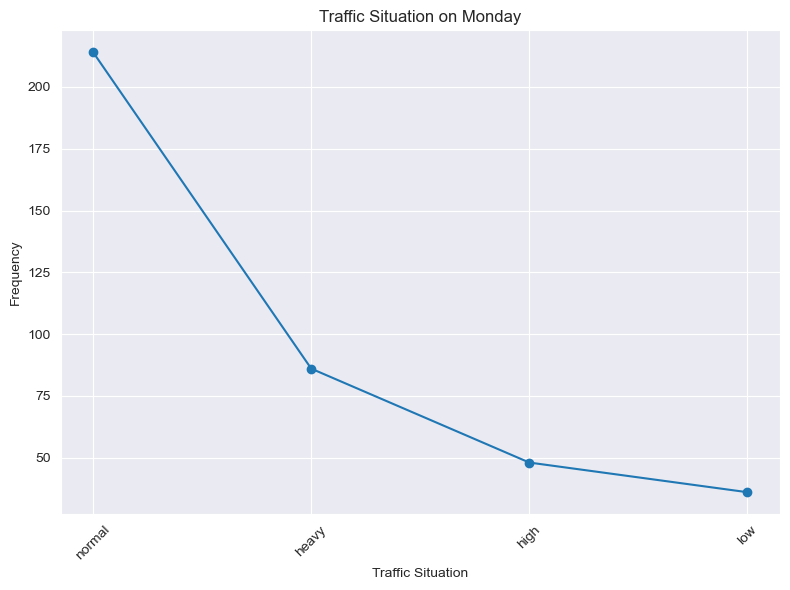

In [76]:
#Traffic density chart for a monthly Monday
plt.figure(figsize=(8, 6))
plt.plot(traffic_counts_monday.index, traffic_counts_monday.values, marker='o', linestyle='-')

plt.title('Traffic Situation on Monday')
plt.xlabel('Traffic Situation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

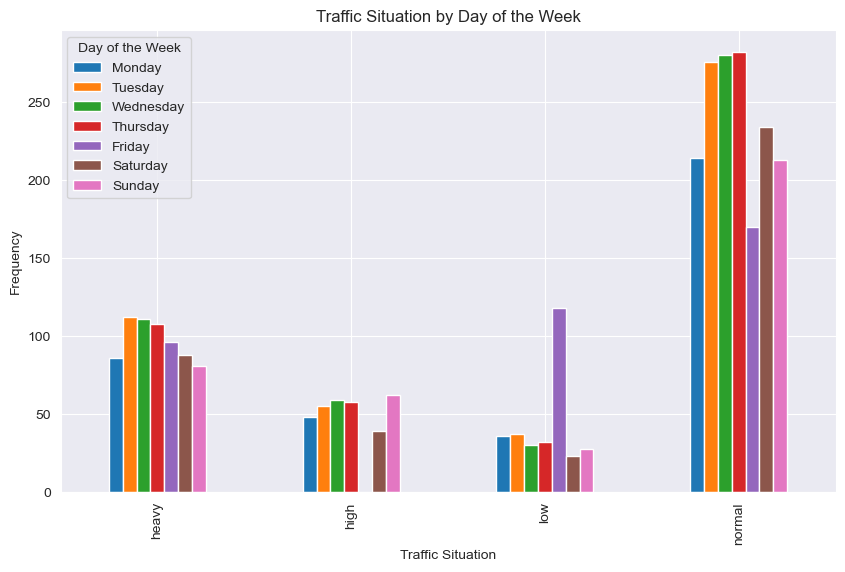

In [77]:
#Traffic density chart for all days for a month
traffic_counts_by_day.plot(kind="bar", figsize=(10, 6))

plt.title("Traffic Situation by Day of the Week")
plt.xlabel("Traffic Situation")
plt.ylabel("Frequency")
plt.legend(title="Day of the Week")

plt.grid(True)
plt.show()

C:\Users\nesli\AppData\Local\Temp\ipykernel_9468\2478681328.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(traffic_data_copy.corr(), annot= True, annot_kws={"size": 6})


<Axes: >

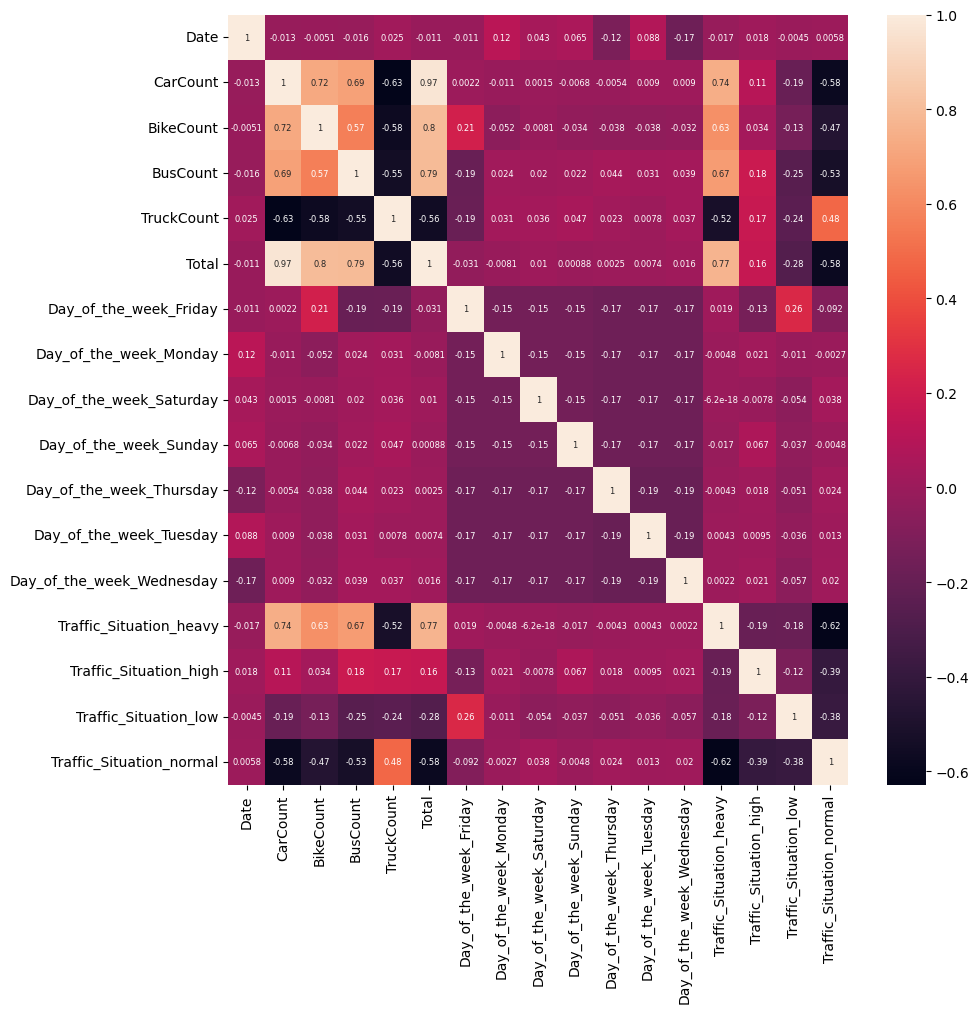

In [29]:
#Correlation matrix and heat map
#Since the structure used affects the data set, I first copied it.
traffic_data_copy = traffic_data.copy()

#I made a conversion because only numerical values were used for the correlation matrix.
# I obtained numerical data by converting the days column to dummy variables
traffic_data_copy = pd.get_dummies(traffic_data_copy, columns=["Day_of_the_week"])

# I obtained numerical data by converting the traffic status column into dummy variables
traffic_data_copy = pd.get_dummies(traffic_data_copy, columns=["Traffic_Situation"])
plt.figure(figsize=(10, 10))
#Finally, I drew the heat map
sns.heatmap(traffic_data_copy.corr(), annot= True, annot_kws={"size": 6})